# Imports

the lifelines framework that used in this study. So, if don`t installed, discomment command below:

In [2]:
#!pip install lifelines

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

# Load dataset

In [4]:
dataset = pd.read_csv("data/lung.csv")
display(dataset.head(3))                                   
dataset.info()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN
1,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
2,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   inst       227 non-null    float64
 1   time       228 non-null    int64  
 2   status     228 non-null    int64  
 3   age        228 non-null    int64  
 4   sex        228 non-null    int64  
 5   ph.ecog    227 non-null    float64
 6   ph.karno   227 non-null    float64
 7   pat.karno  225 non-null    float64
 8   meal.cal   181 non-null    float64
 9   wt.loss    214 non-null    float64
dtypes: float64(6), int64(4)
memory usage: 17.9 KB


The dictionary is in `R_ NCCTG Lung Cancer Data.pdf` file.

transforming dependent variable (a type fo binning):

In [5]:
dataset.loc[dataset.status == 1, "status"] = 0
dataset.loc[dataset.status == 2, "status"] = 1
dataset.head(3)

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,3.0,306,1,74,1,1.0,90.0,100.0,1175.0,NaN
1,3.0,455,1,68,1,0.0,90.0,90.0,1225.0,15.0
2,3.0,1010,0,56,1,0.0,90.0,90.0,NaN,15.0


# Kaplan Meier Estimator

In [6]:
model = KaplanMeierFitter()
model.fit(durations = dataset.time,
          event_observed = dataset.status)
model.event_table.head(4)

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,228,228
5.0,1,1,0,0,228
11.0,3,3,0,0,227
12.0,1,1,0,0,224


In [7]:
model.event_table[model.event_table.entrance !=0]

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,228,228


calculate for specific events:

Survival Function Probability: $S(t_i) = S(t_{i-1})(1 - \frac{d_i}{n_i})$

In [8]:
day_5 = model.event_table.iloc[1, :]
print(f'Row from day 5:')
display(day_5.to_frame())

surv_5 = 1 * (1- day_5.observed / day_5.at_risk)
print(f'Probabily for day 5: {surv_5}')

day_11 = model.event_table.iloc[2, :]
surv_11 = surv_5 * (1 - day_11.observed / day_11.at_risk)
print(f'Probabily for day 11: {surv_11}')


Row from day 5:


,5.0
removed,1
observed,1
censored,0
entrance,0
at_risk,228


Probabily for day 5: 0.9956140350877193
Probabily for day 11: 0.9824561403508771


Approximation:

Get a aproximation from above probability up to survivor aproximantion.

In [9]:
surv_11_approximate = (day_11.at_risk - day_11.observed) / day_11.at_risk
surv_11_approximate

0.986784140969163

# Visualization

plotting survival curve:

Text(0, 0.5, 'Survival')

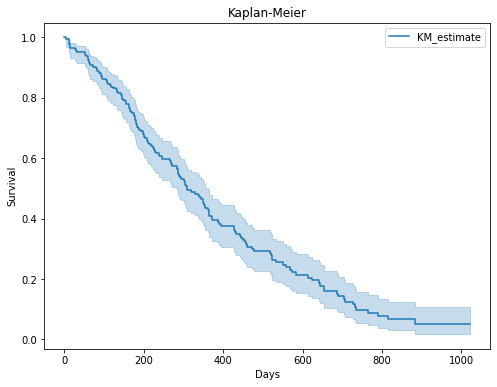

In [10]:
model.plot(figsize = (8,6))
plt.title("Kaplan-Meier")
plt.xlabel("Days")
plt.ylabel("Survival")

plotting cumulative survival curve:

Text(0, 0.5, 'Survival')

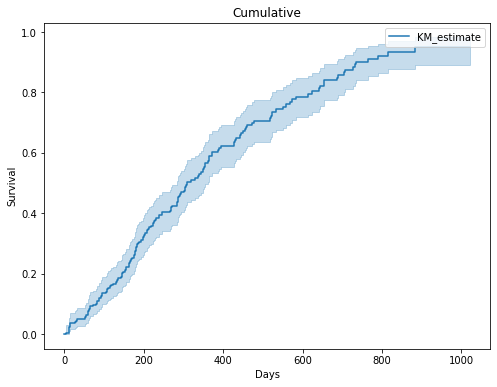

In [11]:
model.plot_cumulative_density(figsize = (8,6))
plt.title("Cumulative")
plt.xlabel("Days")
plt.ylabel("Survival")

## Male vs Female

create DF with males and Females:

In [12]:
male = dataset.query("sex == 1")
female = dataset.query("sex == 2")
female.head()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
6,7.0,310,1,68,2,2.0,70.0,60.0,384.0,10.0
7,11.0,361,1,71,2,2.0,60.0,80.0,538.0,1.0
11,16.0,654,1,68,2,2.0,70.0,70.0,NaN,23.0
12,11.0,728,1,68,2,1.0,90.0,90.0,NaN,5.0
18,1.0,61,1,56,2,2.0,60.0,60.0,238.0,10.0


Kaplan - Meier per gender:

In [13]:
# Male
model_males = KaplanMeierFitter()
model_males.fit(durations = male.time,
                event_observed = male.status)
# Female
model_females = KaplanMeierFitter()
model_females.fit(durations = female.time,
                  event_observed = female.status)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 90 total observations, 37 right-censored observations>

just loc male and female, so get a kaplan-meier estimator from both them.

plotting survival curve:

Text(0, 0.5, 'Survival')

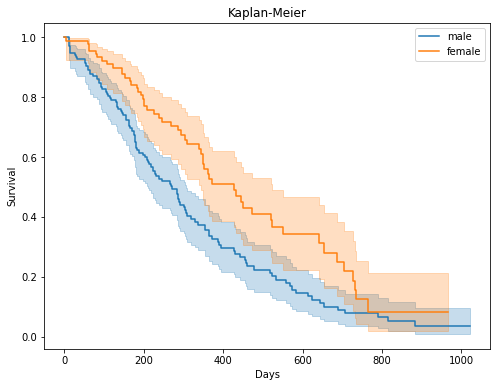

In [14]:
model_males.plot(figsize = (8,6), label = "male")
model_females.plot(label = "female")
plt.title("Kaplan-Meier")
plt.xlabel("Days")
plt.ylabel("Survival")

## Log Rank test

In [15]:
# Criate KME estimate for both and exeucte test.
logrank_test(durations_A = male.time,
             durations_B = female.time,
             event_observed_A = male.status,
             event_observed_B = female.status)

/opt/homebrew/lib/python3.9/site-packages/lifelines/statistics.py:143: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return self.summary.to_latex()


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          10.33 <0.005      9.57

that means both cures are overlaping, because p-value < 0.005.